In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset_df = '/content/house-prices.csv'

df_house = pd.read_csv(dataset_df)
print(f"Full train dataset shape is {df_house.shape}")

Full train dataset shape is (128, 8)


In [ ]:
df_house.drop('Home', axis=1, inplace=True)
df_house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [ ]:
df_house.dtypes

Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [ ]:
df_house.shape

(128, 7)

In [ ]:
df_house['Brick'] = df_house['Brick'].replace({'Yes':1, 'No':0})
df_house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,0,East
1,114200,2030,4,2,3,0,East
2,114800,1740,3,2,1,0,East
3,94700,1980,3,2,3,0,East
4,119800,2130,3,3,3,0,East


In [ ]:
df_house['Brick'].value_counts()
# 0 = no
# 1 = yes

0    86
1    42
Name: Brick, dtype: int64

In [ ]:
df_house['Neighborhood'].value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

In [ ]:
neighborhood_categorikal = pd.get_dummies(df_house['Neighborhood'])
neighborhood_categorikal.head()

,East,North,West
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
df_house.drop('Neighborhood', axis=1, inplace=True)

In [ ]:
df_house_final = pd.concat([df_house,
                            neighborhood_categorikal], axis=1)
df_house_final.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,East,North,West
0,114300,1790,2,2,2,0,1,0,0
1,114200,2030,4,2,3,0,1,0,0
2,114800,1740,3,2,1,0,1,0,0
3,94700,1980,3,2,3,0,1,0,0
4,119800,2130,3,3,3,0,1,0,0


In [ ]:
df_house_final.isnull().sum()

Price        0
SqFt         0
Bedrooms     0
Bathrooms    0
Offers       0
Brick        0
East         0
North        0
West         0
dtype: int64

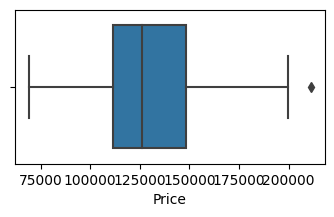

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df_house_final['Price'].quantile(0.25)
Q3 = df_house_final['Price'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

plt.figure(figsize=(4,2))
sns.boxplot(x=df_house_final['Price'])
plt.show()

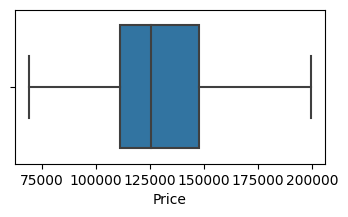

In [ ]:
df_house_final = df_house_final[(df_house_final['Price'] > Lower_bound) & (df_house_final['Price'] < Upper_bound)]

plt.figure(figsize=(4,2))
sns.boxplot(x=df_house_final['Price'])
plt.show()

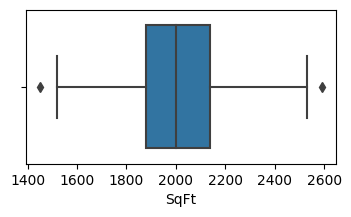

In [ ]:
Q1 = df_house_final['SqFt'].quantile(0.25)
Q3 = df_house_final['SqFt'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

plt.figure(figsize=(4,2))
sns.boxplot(x=df_house_final['SqFt'])
plt.show()

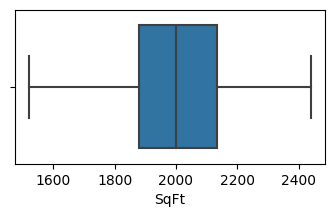

In [ ]:
df_house_final = df_house_final[(df_house_final['SqFt'] > Lower_bound) & (df_house_final['SqFt'] < Upper_bound)]

plt.figure(figsize=(4,2))
sns.boxplot(x=df_house_final['SqFt'])
plt.show()

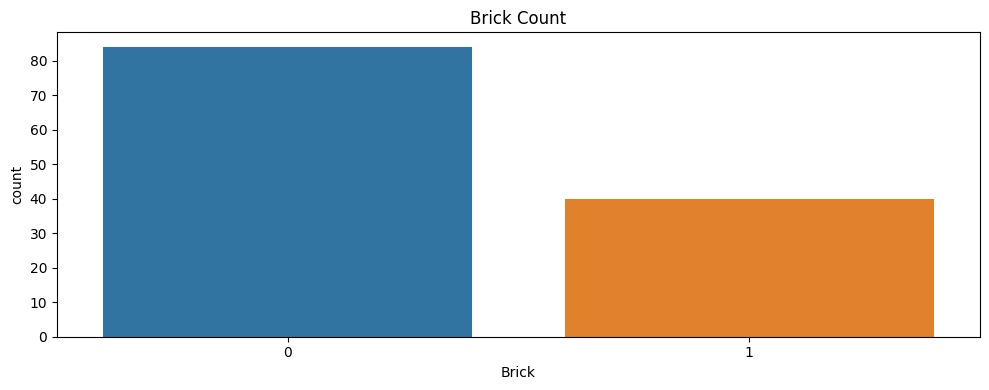

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Brick', data=df_house_final)
plt.title('Brick Count')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

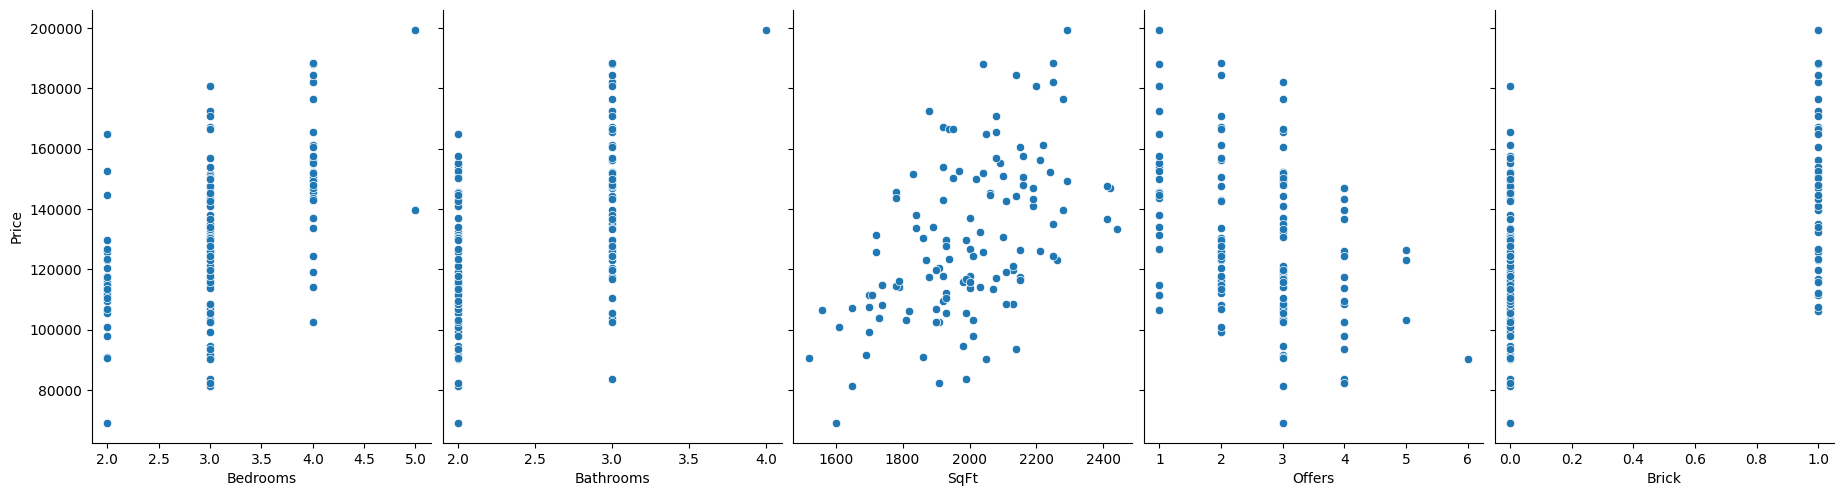

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_house_final, x_vars=['Bedrooms', 'Bathrooms', 'SqFt', 'Offers', 'Brick'], y_vars=['Price'], size=5, aspect=0.75)

<Axes: ylabel='Density'>

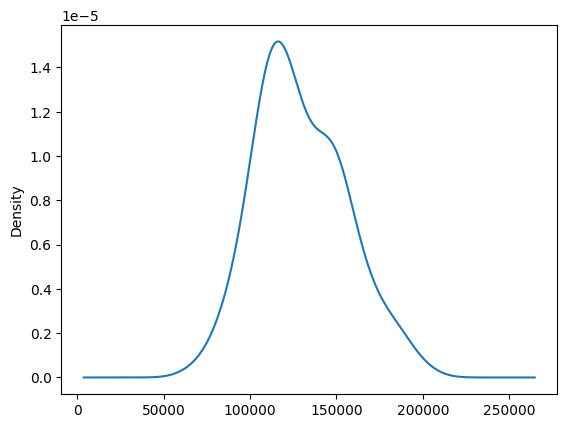

In [ ]:
df_house_final['Price'].plot(kind='kde')

In [ ]:
x = np.array(df_house_final.drop(['Price'], axis=1))
y = np.array(df_house_final['Price'])

xtrain, x_test, ytrain, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
model = LinearRegression()
model.fit(xtrain, ytrain)

print(model.score(x_test, y_test))

0.8425846041045582


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([161812.19357668, 138068.69126577, 159558.71637609, 119136.64445062,
        94331.90222625, 147334.78288784, 158199.76046017, 159088.46332116,
       120350.77230153, 125662.66103088,  88119.97312195,  97889.25124432,
       100664.41903245, 138574.71318057,  99630.88810644, 141852.44681606,
       127867.46652243, 132189.27157688, 123913.93974326, 116227.39214567,
       113764.15253254, 136654.63869452, 103945.60873539, 102922.82135758,
       147698.05389077])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 89725551.59828337
R-squared: 0.8425846041045582


In [ ]:
# Testing Prediction
pred = np.array([[1880, 3, 1, 2, 1, 0 ,1, 0]])
print(model.predict(pred))

[121532.79041527]


In [ ]:
x_test

array([[1920,    3,    3,    2,    1,    0,    0,    1],
       [1920,    3,    2,    1,    1,    1,    0,    0],
       [2420,    4,    3,    4,    0,    0,    0,    1],
       [2130,    3,    2,    3,    0,    0,    1,    0],
       [1650,    3,    2,    3,    0,    0,    1,    0],
       [2110,    3,    2,    2,    0,    0,    0,    1],
       [2240,    4,    3,    3,    0,    0,    0,    1],
       [2020,    3,    3,    1,    0,    0,    0,    1],
       [2070,    2,    2,    2,    0,    0,    1,    0],
       [2130,    3,    3,    3,    0,    1,    0,    0],
       [1600,    2,    2,    3,    0,    0,    1,    0],
       [1910,    3,    2,    4,    0,    1,    0,    0],
       [1810,    3,    2,    3,    0,    1,    0,    0],
       [2000,    2,    2,    1,    1,    1,    0,    0],
       [1790,    3,    2,    3,    0,    1,    0,    0],
       [1780,    4,    2,    1,    0,    0,    0,    1],
       [2030,    3,    2,    3,    1,    1,    0,    0],
       [2410,    3,    3,    4,